### Ruth Maina

#### Applied Data Science - A Comprehensive Exploration of the Obesity Epidemic
 

In [16]:
#suppress warning messages for cleaner code
options(warn = -1)

In [4]:
## Loading the dataset
obesityData_df <- read.csv("adults_over18.csv")

In [6]:
## Check the target variable data type
is.integer(obesityData_df$Data_Value)

[1] FALSE

In [17]:
## Per above outcome need convert to int
obesityData_df$Data_Value <- as.integer(obesityData_df$Data_Value)

In [18]:
## Verify converted to int
is.integer(obesityData_df$Data_Value)

[1] TRUE

In [19]:
## Load library and review summary stats
library(psych)
describe(obesityData_df$Data_Value)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,589,29.7674,4.053875,30,29.74207,4.4478,20,40,20,0.07770889,-0.4507718,0.167037


In [20]:
#high level view of how the data is distributed
summary(obesityData_df$Data_Value)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  20.00   27.00   30.00   29.77   33.00   40.00      13 

In [21]:
#import library needed for plotting 
library(ggplot2)

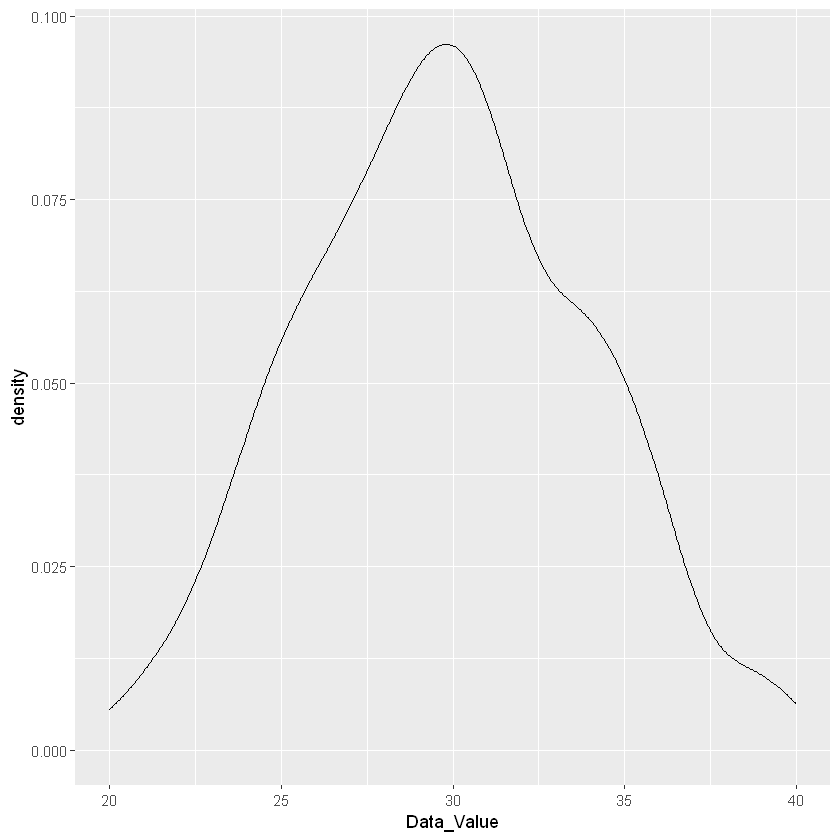

In [22]:
#The distribution of obesity is mostly normal/symmetrical and unimodal with one clear peak in the data, without outliers or skew
ggplot(obesityData_df, aes(x=Data_Value)) + geom_density()

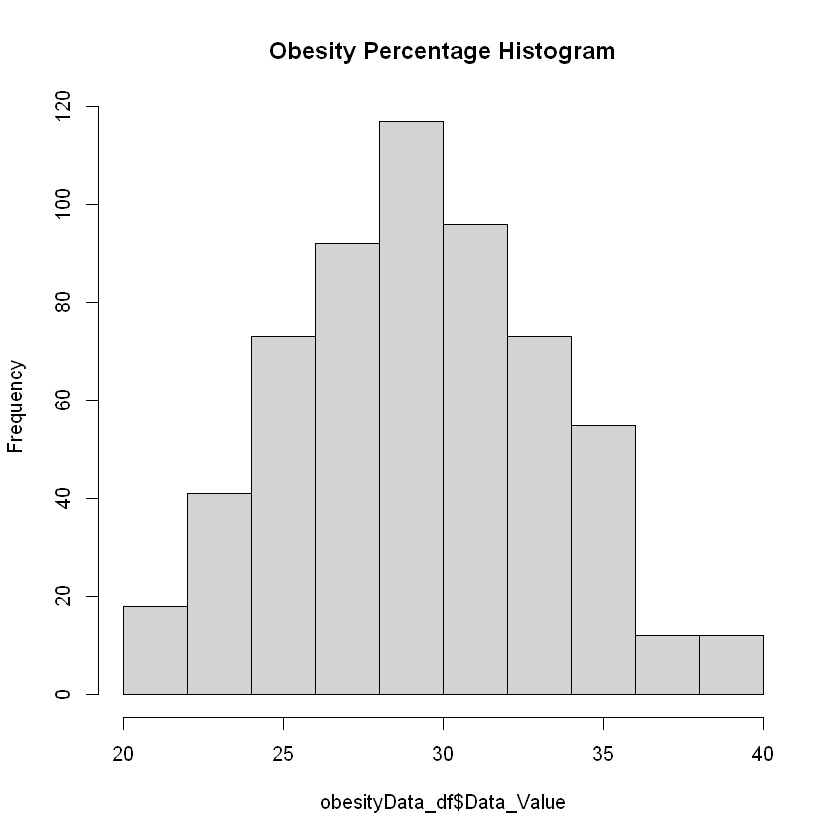

In [23]:
#histogram is consistent with density plot on data distribution
hist(obesityData_df$Data_Value, main = "Obesity Percentage Histogram")

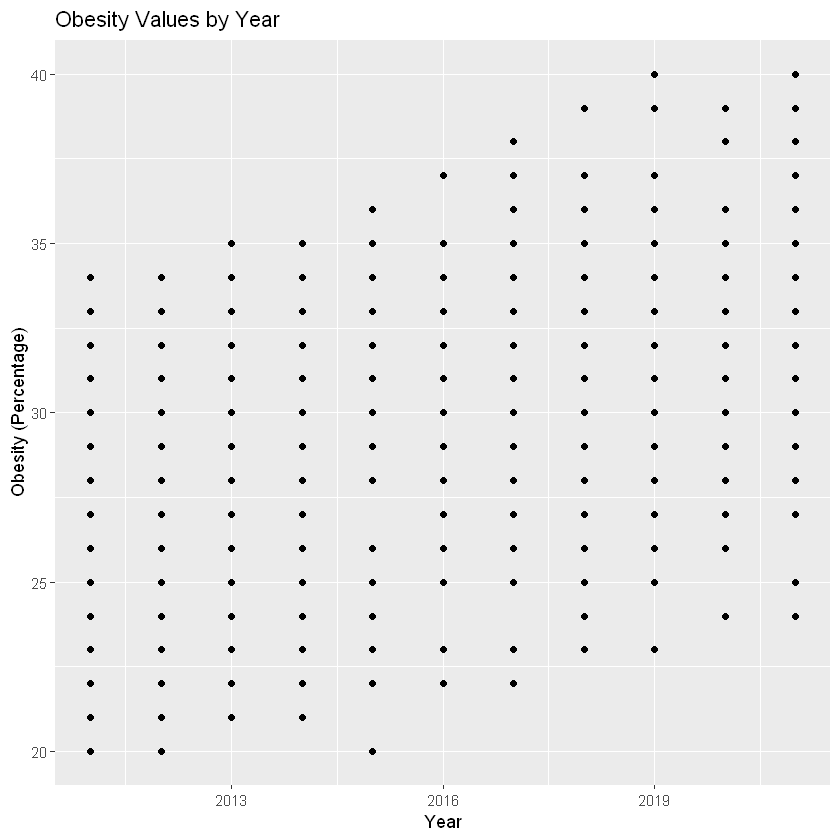

In [24]:
#Obesity by Year  
ggplot(obesityData_df, aes(x=YearStart, y=Data_Value)) + geom_point() + 
ggtitle("Obesity Values by Year") + xlab("Year") + ylab("Obesity (Percentage)")

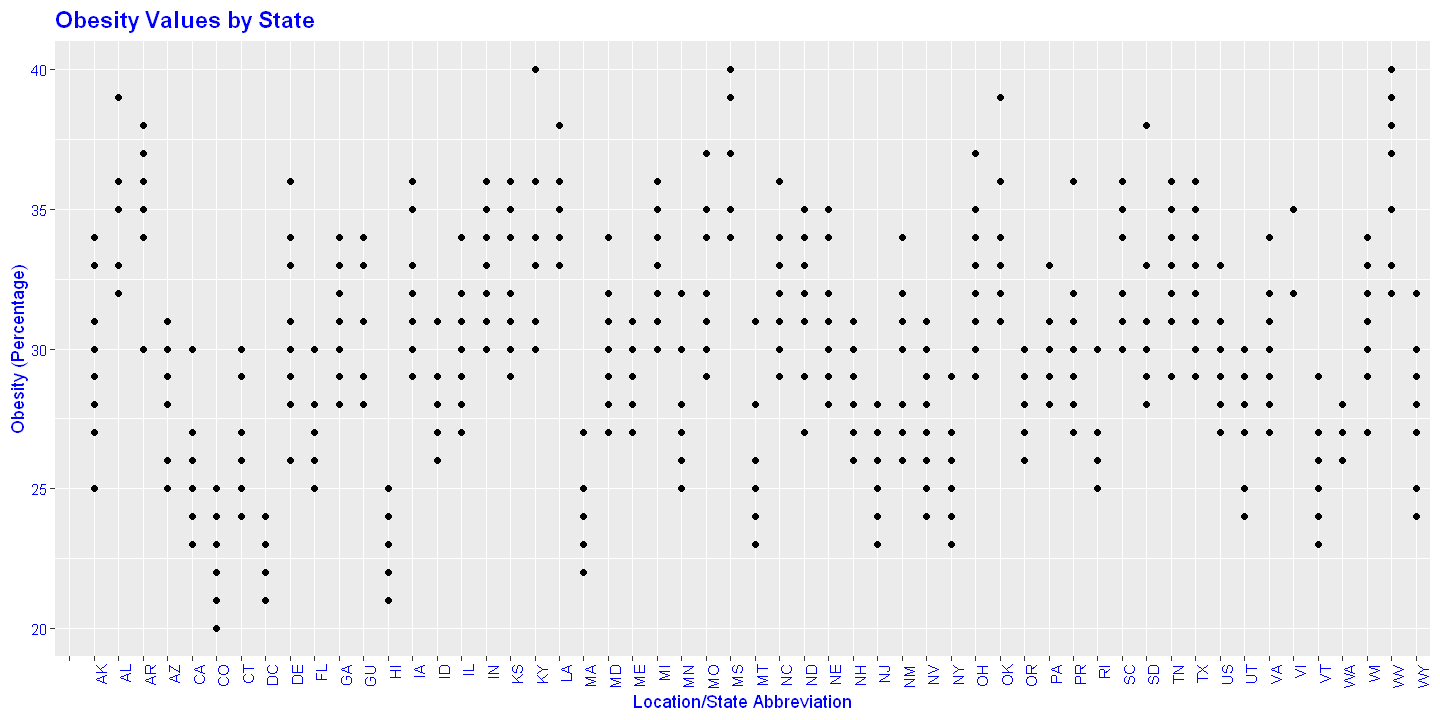

In [36]:
#Obesity by State 
options(repr.plot.width = 12, repr.plot.height = 6)  # Set plot size
ggplot(obesityData_df, aes(x=LocationAbbr, y=Data_Value)) + 
  geom_point() + 
  ggtitle("Obesity Values by State") + 
  xlab("Location/State Abbreviation") + 
  ylab("Obesity (Percentage)") + 
  theme(
    # Title color
    plot.title = element_text(color = "blue", size = 14, face = "bold"),
    
    # X-axis text color
    axis.text.x = element_text(color = "blue", angle = 90, hjust = 1),
    
    # Y-axis text color
    axis.text.y = element_text(color = "blue"),
    
    # X-axis label color
    axis.title.x = element_text(color = "blue"),
    
    # Y-axis label color
    axis.title.y = element_text(color = "blue")
  )

In [25]:
#fit a linear model below using the Year variable as the predictor and Obesity as the outcome
obesity_lm <- lm(formula = Data_Value ~ YearStart, data=obesityData_df)
summary(obesity_lm)
obesity_lm


Call:
lm(formula = Data_Value ~ YearStart, data = obesityData_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.1784 -2.4644  0.1075  2.5356  8.5356 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.122e+03  9.590e+01  -11.70   <2e-16 ***
YearStart    5.715e-01  4.757e-02   12.01   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.635 on 587 degrees of freedom
  (13 observations deleted due to missingness)
Multiple R-squared:  0.1974,	Adjusted R-squared:  0.196 
F-statistic: 144.3 on 1 and 587 DF,  p-value: < 2.2e-16



Call:
lm(formula = Data_Value ~ YearStart, data = obesityData_df)

Coefficients:
(Intercept)    YearStart  
 -1122.3737       0.5715  


In [37]:
#predict obesity for the next few years
next_ten_years <- data.frame(YearStart = c(2024,2025,2026,2027,2028,2029,2030, 2031, 2032, 2033, 2034))
linear_model <- lm(Data_Value ~ YearStart, data=obesityData_df)
predict(linear_model, newdata = next_ten_years)
predict(linear_model, newdata = next_ten_years, interval = 'confidence')

1        2        3        4        5        6        7        8 
34.32186 34.89335 35.46484 36.03633 36.60782 37.17931 37.75080 38.32229 
       9       10       11 
38.89378 39.46527 40.03676

,fit,lwr,upr
1,34.32186,33.52132,35.12240
2,34.89335,34.00526,35.78144
3,35.46484,34.48811,36.44157
4,36.03633,34.97014,37.10252
5,36.60782,35.45154,37.76409
6,37.17931,35.93246,38.42616
7,37.75080,36.41298,39.08862
8,38.32229,36.89318,39.75139
9,38.89378,37.37313,40.41442
10,39.46527,37.85286,41.07768


### Summary of findings (summarized better in the write up).

#### • The above analysis has shed light on obesity, providing analysis of the past decade and a potential prediction of the next ten years. The obesity issue can be tackled in many ways and intervention opportunities could be explored from all angles, particularly from governing bodies and community education.
#### •	The trend percentages for the last decade and future prediction indicate an increased disparity from 2011 – 2030, which would help the audience see the importance of the matter.
#### •	While the last decade/actual data shows a sharp increase, the latter decade prediction shows a levelling off, which could mean that some causative factor could be helping avoid gradual increases compared to the last decade.
